# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón:
1. **Perceptrón con Keras**: luego, vamos a entrenar un Perceptrón con Keras sobre el mismo dataset. Vamos a usarlo como excusa para presentar las principales características de la librería.

## 2. Perceptron con Keras


Keras es un entorno de desarrollo para Redes Neuronales de alto nivel. Esto quiere decir que es - o al menos trata de ser- más amigable que otros entornos de desarrollo, como por ejemplo TensorFlow. Sin embargo, está basado en TensorFlow, que es quien hace el "trabajo pesado". Una de las principales ventajas de Keras es que es rápido para hacer prototipos, hay muchas funciones de costo, optimizadores y tipo de neuronas implementadas, lo cual lo hacen muy versátil.

Tal vez una desventaja sea que la documentación tiende a ser escueta. Pero por otro lado hay muchos ejemplos y tutoriales en internet que se pueden usar que están buenos.

https://keras.io/getting-started/sequential-model-guide/

Los pasos básicos a seguir con Keras son:
1. Definimos un modelo: indicamos cantidad y tipos de neuronas.
2. Compilamos el modelo: indicamos función de costo y optimizador.
3. Entrenamos el modelo: cantidad de iteraciones y otros parámetros.

1. Definimos el modelo. El tipo de modelo se llama `Sequential` y le agregamos una capa (`layer`) con una Neurona `Dense`, con una función de activación `'sigmoid'`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
import keras

AttributeError: module 'keras.engine.base_layer' has no attribute 'BaseRandomLayer'

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
model = Sequential([
    Dense(1, input_shape=(1,)),
    Activation('sigmoid'),
])

2. Compilamos el modelo llamando a `model.compile(...)`. Los argumentos más importantes son el optimizador `optimizer`, la pérdida `loss` y, si queremos, un métrica que evalúa durante el entrenamiento. **Importante**: solamente la evalúa, nada más.

La forma en que pasamos los argumentos no es la única que hay, también se pueden crear *objetos* optimizadores y pasarles argumentos de forma más detallada. Mirar algunos ejemplos en la documentación.

In [4]:
#model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#optimizer='sgd'
#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
#model.compile(optimizer= optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
x_train_prueba = np.random.random((1000, 1))
y_train_prueba = np.random.randint(2, size=(1000, 1))
x_train_prueba.shape

(1000, 1)

In [8]:
y_train_prueba.shape

(1000, 1)

In [10]:
dataset = pd.read_csv('../DataSets/challenger.csv')
dataset.dropna(inplace = True) # Tiramos los NaN (una sola fila)
dataset['Temperature (C)'] = np.round((dataset['Temperature'] - 32)/1.8,2) # pasamos a celcius
dataset

,Date,Temperature,Damage Incident,Temperature (C)
0,04/12/1981,66,0,18.89
1,11/12/1981,70,1,21.11
2,3/22/82,69,0,20.56
4,01/11/1982,68,0,20.00
5,04/04/1983,67,0,19.44
6,6/18/83,72,0,22.22
7,8/30/83,73,0,22.78
8,11/28/83,70,0,21.11
9,02/03/1984,57,1,13.89
10,04/06/1984,63,1,17.22


In [11]:
X = dataset.drop([24])['Temperature (C)'].values
y = dataset.drop([24])['Damage Incident'].values.astype(int)

In [12]:
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean)/X_std

3. Entrenamos el modelo con `model.fit(...)`. Los argumentos son, en primer lugar, los features `X` y las etiquetas `y`, y la cantidad de iteraciones `epochs`.

In [13]:
#prueba1 = model.fit(x_train_prueba, y_train_prueba, epochs=25)#, batch_size=128)
history = model.fit(X, y, epochs=25, batch_size=128)

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 0.9509 - accuracy: 0.3913
Epoch 2/25
1/1 [==============================] - 0s 7ms/step - loss: 0.9490 - accuracy: 0.3913
Epoch 3/25
1/1 [==============================] - 0s 6ms/step - loss: 0.9475 - accuracy: 0.3913
Epoch 4/25
1/1 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.3913
Epoch 5/25
1/1 [==============================] - 0s 5ms/step - loss: 0.9453 - accuracy: 0.3913
Epoch 6/25
1/1 [==============================] - 0s 6ms/step - loss: 0.9443 - accuracy: 0.3913
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 0.9434 - accuracy: 0.3913
Epoch 8/25
1/1 [==============================] - 0s 6ms/step - loss: 0.9426 - accuracy: 0.3913
Epoch 9/25
1/1 [==============================] - 0s 7ms/step - loss: 0.9418 - accuracy: 0.3913
Epoch 10/25
1/1 [==============================] - 0s 21ms/step - loss: 0.9410 - accuracy: 0.3913
Epoch 11/25
1/1 [======================

Acá ya tenemos el modelo entrenado. Algunas funciones de Keras que están buenas:

1. Obviamente, hacer predicciones:

In [14]:
valor_a_predecir = -1
valor_a_predecir = (valor_a_predecir - X_mean)/X_std
model.predict([valor_a_predecir])

array([[0.01637411]], dtype=float32)

In [15]:
X_std

3.834305451926952

¿Qué significa ese número que devuelve?

2. Ver la cantidad de parámetros y capas del modelo. Tendrá más sentido cuando entrenemos redes más profundas

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


3. Ver la historia de entrenamiento del modelo. History es un objeto con muchas características, pero tiene guardado la pérdida para cada iteración y la métrica que le hayamos pedido que evalúe.

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


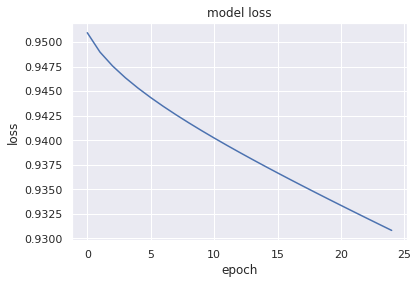

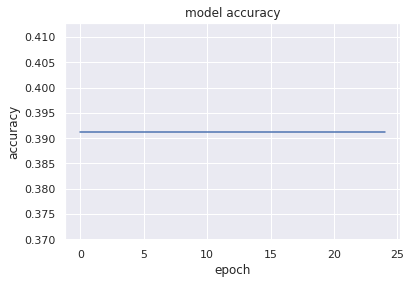

In [18]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


4. Se pueden ver los pesos que obtuvo

In [19]:
print(model.get_weights())

[array([[0.7121907]], dtype=float32), array([-0.03361154], dtype=float32)]


In [20]:
w0 = model.get_weights()[0][0][0]
w1 = model.get_weights()[1][0]
print(w0,w1)

0.7121907 -0.033611543


5. Y, como en todo modelo, podemos graficar el resultado. 

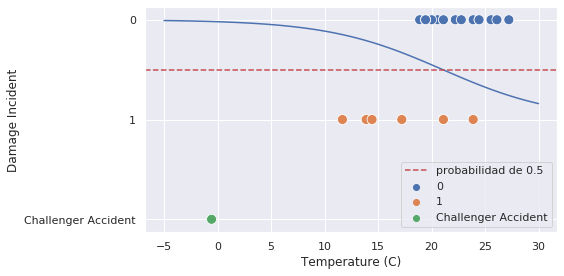

In [21]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)

x_plot = np.linspace(-5,30,100)
z = (x_plot - X_mean)/X_std
plt.plot(x_plot, model.predict(z))
# plt.plot(x_plot, sigmoid_function(z,w0,w1))

plt.axhline(0.5, ls = '--', c = 'r', label = 'probabilidad de 0.5')
plt.legend()
plt.tight_layout()
plt.show()